Adease time series objective : 

The objective of this project is to solve the problem of forecasting future web traffic for approximately 145,000 wikipedia articles.

Need forecast on model will perform on pages in different languages.

Desc : For each time series, you are provided the name of the article as well as the type of traffic that this time series represent (all, mobile, desktop, spider). You may use this metadata and any other publicly available data to make predictions. Unfortunately, the data source for this dataset does not distinguish between traffic values of zero and missing values. A missing value may mean the traffic was zero or that the data is not available for that day.

Each of these time series represent a number of daily views of a different Wikipedia article, starting from July, 1st, 2015 up until December 31st, 2016.

In [1]:
# import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')



In [2]:
df =pd.read_csv('train_1.csv')

In [3]:
df.shape

(145063, 551)

In [4]:
df.head(4)

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


In [6]:
df["Page"].head(4)

0       2NE1_zh.wikipedia.org_all-access_spider
1        2PM_zh.wikipedia.org_all-access_spider
2         3C_zh.wikipedia.org_all-access_spider
3    4minute_zh.wikipedia.org_all-access_spider
Name: Page, dtype: object

The page name contains data in this format:

SPECIFIC NAME _ LANGUAGE.wikipedia.org _ ACCESS TYPE _ ACCESS ORIGIN

In [7]:
df.isna().sum()

Page              0
2015-07-01    20740
2015-07-02    20816
2015-07-03    20544
2015-07-04    20654
              ...  
2016-12-27     3701
2016-12-28     3822
2016-12-29     3826
2016-12-30     3635
2016-12-31     3465
Length: 551, dtype: int64

Plotting the null values

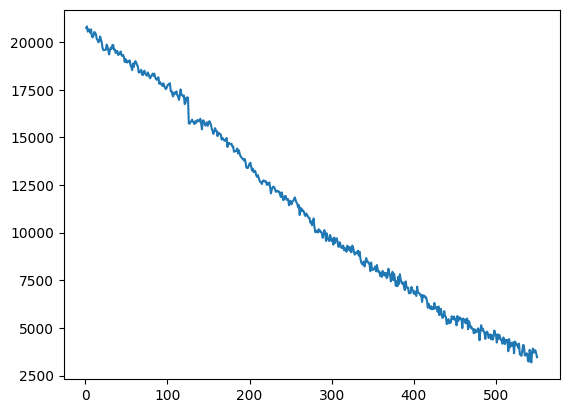

In [8]:
total_days = [i for i in range(1,len(df.columns))]
# Total 550 days  
# checking the null values 

plt.plot(total_days,[df[i].isna().sum() for i in df.columns[1:]])

We could see that as the number of days increases the number of null values decreases. As the data represent web traffic per day for each page.We could assume that the recently added pages have zero traffic or NaN values.

In [9]:
max(df.columns[1:]) , min(df.columns[1:])
# range of the data

('2016-12-31', '2015-07-01')

let's drop the rows that has all the null values ,
drop the rows that has more than 300 days values of null out of 550 days 
rest let's fill with NaN values.

In [10]:
print("original shape",df.shape)

df = df.dropna(how='all') # drop all rows with all null values

print("new shape",df.shape)

# drop rows with 300 null vlaues 
df = df.dropna(thresh=300) 

print("new shape_300",df.shape)

original shape (145063, 551)
new shape (145063, 551)
new shape_300 (133617, 551)


In [11]:
# filling the null values with 0 
df = df.fillna(0)

In [12]:
df.tail(10)

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
145005,Torneo_Apertura_2016_(México)_es.wikipedia.org...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13.0,99.0,39.0,164.0,286.0,116.0,247.0,46.0,29.0,32.0
145008,Outcast_(serie_de_televisión)_es.wikipedia.org...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,3.0,3.0,4.0,4.0,2.0,1.0,7.0,0.0,4.0
145009,Manchester_by_the_Sea_(película)_es.wikipedia....,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,68.0,5.0,19.0,8.0,11.0,16.0,45.0,42.0,3.0,3.0
145010,Yo_antes_de_ti_(película)_es.wikipedia.org_all...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,17.0,4.0,8.0,4.0,20.0,4.0,8.0,5.0,6.0
145011,Sueño_de_amor_(telenovela_de_2016)_es.wikipedi...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,53.0,31.0,35.0,3.0,29.0,24.0,4.0,6.0,7.0,39.0
145012,Legión_(Marvel_Comics)_es.wikipedia.org_all-ac...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,3.0,2.0,4.0,2.0,4.0,4.0,1.0,2.0,2.0
145013,Referéndum_sobre_la_permanencia_del_Reino_Unid...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,16.0,8.0,3.0,6.0,3.0,3.0,10.0,11.0,3.0
145014,Salida_del_Reino_Unido_de_la_Unión_Europea_es....,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,29.0,36.0,23.0,182.0,43.0,8.0,22.0,13.0,18.0,14.0
145015,"Amar,_después_de_amar_es.wikipedia.org_all-acc...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,30.0,27.0,14.0,8.0,7.0,5.0,43.0,12.0,25.0
145016,Anexo:89.º_Premios_Óscar_es.wikipedia.org_all-...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


EDA

Separate values from page like title, language, access type and access origin

In [13]:
import regex as re 

In [14]:
def split_page(page):
    # split at "_" or "." 
    splitted = re.split('_|\.',page) 
    return ' '.join(splitted[:-5]),splitted[-5],splitted[-2],splitted[-1]

    


In [15]:
split_page('2NE1_zh.wikipedia.org_all-access_spider')

('2NE1', 'zh', 'all-access', 'spider')

In [16]:
temp = list(df["Page"].apply(split_page))

In [17]:
temp = pd.DataFrame(temp,columns=['title','lang','access_type','access_origin'])

In [18]:
df = pd.concat([df,temp],axis=1)

In [19]:
df.head(4)

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,title,lang,access_type,access_origin
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,14.0,20.0,22.0,19.0,18.0,20.0,2NE1,zh,all-access,spider
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,9.0,30.0,52.0,45.0,26.0,20.0,2PM,zh,all-access,spider
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,4.0,4.0,6.0,3.0,4.0,17.0,3C,zh,all-access,spider
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,16.0,11.0,17.0,19.0,10.0,11.0,4minute,zh,all-access,spider


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot: xlabel='lang', ylabel='count'>

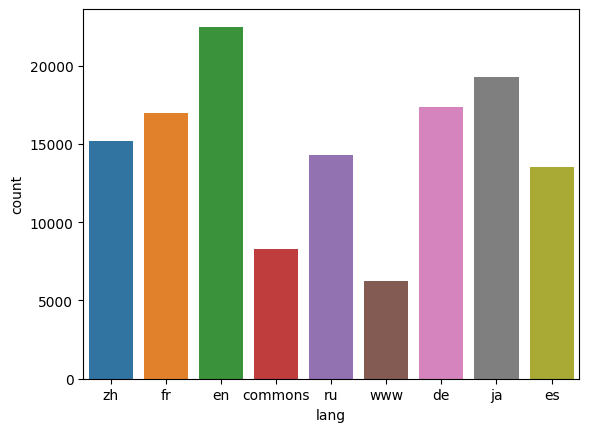

In [21]:
sns.countplot(x='lang',data=df)

In [22]:
df.columns

Index(['Page', '2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
       '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09',
       ...
       '2016-12-26', '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30',
       '2016-12-31', 'title', 'lang', 'access_type', 'access_origin'],
      dtype='object', length=555)

In [23]:
df["lang"].value_counts(normalize=True)

en         0.168287
ja         0.144405
de         0.129939
fr         0.126840
zh         0.113840
ru         0.106798
es         0.101417
commons    0.061863
www        0.046611
Name: lang, dtype: float64

In [24]:
df["access_type"].value_counts()

all-access    68718
mobile-web    33299
desktop       31600
Name: access_type, dtype: int64

<AxesSubplot: xlabel='access_origin', ylabel='count'>

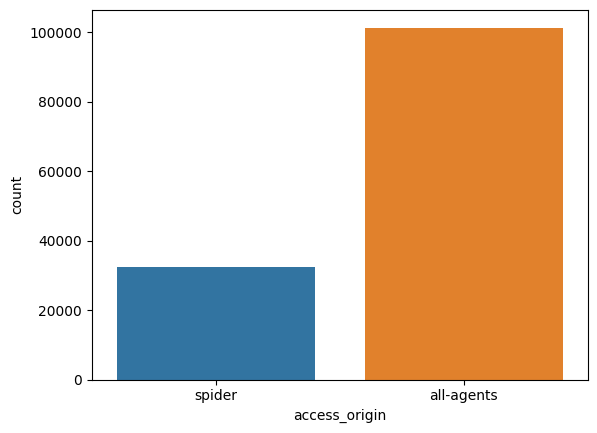

In [25]:
sns.countplot(x='access_origin',data=df)

When compared to bots, the majority of the pages are visited by people or organic view.

In [26]:
df.groupby("lang").mean()

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
lang,,,,,,,,,,,,,,,,,,,,,
commons,3418.187826,3401.103363,3307.163060,3390.042492,3522.260036,3630.502737,3482.651851,3411.574948,3375.341111,3295.898201,...,5045.700600,4407.704901,4492.380735,4714.261731,5300.816475,5547.263686,5320.972106,5753.922706,4566.859359,4348.738530
de,295.493666,290.430641,286.196287,303.238743,317.944688,303.907814,296.403675,304.135081,307.627367,320.526527,...,356.320143,372.946507,365.633764,384.961620,388.667628,386.211401,384.710774,404.172959,389.619528,431.513295
en,1727.580740,1713.580595,1555.654639,1493.560266,1581.818817,1889.538780,1808.734657,1695.638356,1740.442962,1724.306870,...,2286.304365,2196.943684,2222.172801,2307.059206,2614.897678,2825.008960,2740.355477,2934.513248,2350.004721,2243.430581
es,251.141995,291.923459,242.822383,229.509048,237.705249,277.275840,275.131399,264.193756,255.667427,252.289452,...,284.251712,301.781464,276.692289,283.209814,380.066922,395.420199,370.171177,363.423133,344.576215,325.006684
fr,406.026917,396.203463,400.320016,501.218187,460.476067,426.101310,411.575561,415.765404,407.970165,412.383772,...,497.793812,613.040018,574.290894,648.308146,695.129200,619.959398,602.927098,614.458295,654.068232,683.744844
ja,403.823138,482.443264,413.968772,461.208499,490.145634,449.440754,425.516694,422.994396,426.502276,418.392073,...,514.614931,591.837205,596.429781,621.518970,650.240894,673.732431,668.514826,739.548214,670.735641,738.753502
ru,1166.175839,1140.778155,1096.175531,1080.473331,1170.957545,1221.919182,1182.639599,1171.724199,1150.085527,1097.955307,...,1044.714705,1022.594751,1057.016905,1281.614435,1424.160324,1266.212273,1228.020224,1226.597916,1057.697260,1132.103667
www,5578.340763,5641.656277,5400.232283,5664.424865,5814.667247,6203.173429,5844.559290,5446.591154,5596.114923,5689.238203,...,7094.035173,6816.065297,7519.277381,8017.409542,8977.584538,8786.032561,8632.590110,8661.561553,7855.572697,7942.211910
zh,784.954665,772.002156,741.925160,864.563220,853.669653,816.733244,801.487774,795.390165,780.966858,802.691411,...,926.583698,1068.725295,990.114180,1088.071539,1141.361199,1078.681037,1056.301650,994.841361,1017.394005,1134.651735


In [28]:
# extarcting the first two letters of the url to get the actual languages.

match = re.search('[a-z][a-z].wikipedia.org', 'https://en.wikipedia.org/wiki/Python')

print(match)
print(match[0])  # Output: en.wikipedia.org
print(match[0][0:2])  # Output: en
 # Error: TypeError: 're.Match' object is not subscriptable

<re.Match object; span=(8, 24), match='en.wikipedia.org'>
en.wikipedia.org
en


In [29]:
def languag(url):
    match = re.search('[a-z][a-z].wikipedia.org', url)
    if match:
        return match[0][0:2]
    else:
        return "no_lang"
    
df["lang"] = df["Page"].apply(lambda x : languag(str(x)))

In [31]:
df.groupby("lang").count()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,title,access_type,access_origin
lang,,,,,,,,,,,,,,,,,,,,,
de,17362,17362,17362,17362,17362,17362,17362,17362,17362,17362,...,17362,17362,17362,17362,17362,17362,17362,13046,13046,13046
en,22486,22486,22486,22486,22486,22486,22486,22486,22486,22486,...,22486,22486,22486,22486,22486,22486,22486,22486,22486,22486
es,13551,13551,13551,13551,13551,13551,13551,13551,13551,13551,...,13551,13551,13551,13551,13551,13551,13551,10142,10142,10142
fr,16948,16948,16948,16948,16948,16948,16948,16948,16948,16948,...,16948,16948,16948,16948,16948,16948,16948,16948,16948,16948
ja,19295,19295,19295,19295,19295,19295,19295,19295,19295,19295,...,19295,19295,19295,19295,19295,19295,19295,16140,16140,16140
no_lang,14494,14494,14494,14494,14494,14494,14494,14494,14494,14494,...,14494,14494,14494,14494,14494,14494,14494,25374,25374,25374
ru,14270,14270,14270,14270,14270,14270,14270,14270,14270,14270,...,14270,14270,14270,14270,14270,14270,14270,14270,14270,14270
zh,15211,15211,15211,15211,15211,15211,15211,15211,15211,15211,...,15211,15211,15211,15211,15211,15211,15211,15211,15211,15211


In [36]:
# we can't use count , let's try mean for timeseries

df_mean = df.groupby("lang").mean().T

In [37]:
df_mean.head(3)

lang,de,en,es,fr,ja,no_lang,ru,zh
2015-07-01,763.765926,3767.328604,1127.485204,499.092872,614.637160,102.733545,663.199229,272.498521
2015-07-02,753.362861,3755.158765,1077.485425,502.297852,705.813216,107.663447,674.677015,272.906778
2015-07-03,723.074415,3565.225696,990.895949,483.007553,637.451671,101.769629,625.329783,271.097167


In [38]:
df_mean.reset_index(inplace=True)

In [40]:
df_mean.set_index("index",inplace=True)

In [41]:
df_mean.head(3)

lang,de,en,es,fr,ja,no_lang,ru,zh
index,,,,,,,,
2015-07-01,763.765926,3767.328604,1127.485204,499.092872,614.637160,102.733545,663.199229,272.498521
2015-07-02,753.362861,3755.158765,1077.485425,502.297852,705.813216,107.663447,674.677015,272.906778
2015-07-03,723.074415,3565.225696,990.895949,483.007553,637.451671,101.769629,625.329783,271.097167


In [42]:
df_mean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 550 entries, 2015-07-01 to 2016-12-31
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   de       550 non-null    float64
 1   en       550 non-null    float64
 2   es       550 non-null    float64
 3   fr       550 non-null    float64
 4   ja       550 non-null    float64
 5   no_lang  550 non-null    float64
 6   ru       550 non-null    float64
 7   zh       550 non-null    float64
dtypes: float64(8)
memory usage: 38.7+ KB


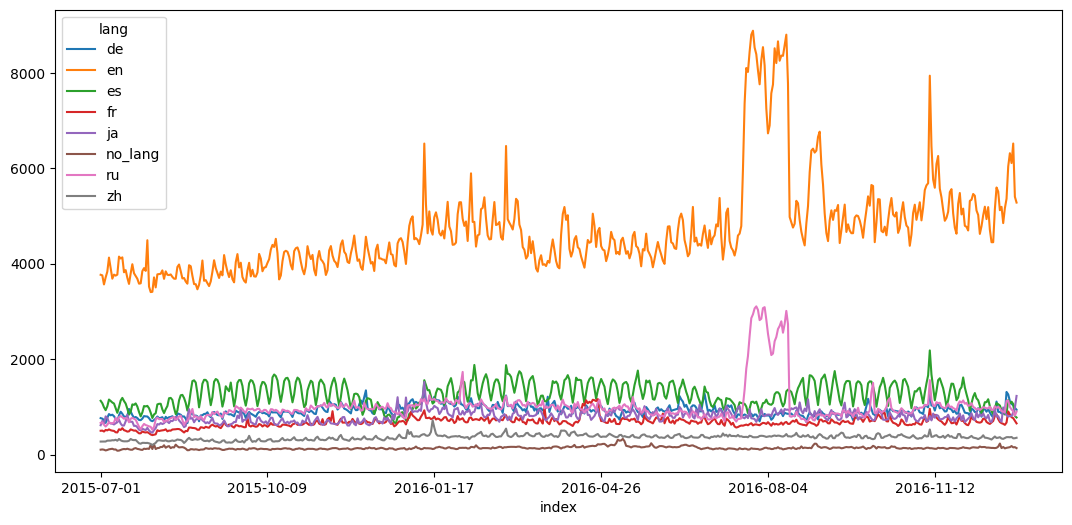

In [48]:
# line plot for df_mean  

df_mean.plot(figsize=(13,6))
plt.show()

So , english languages pages are the most visited pages compared to other languages. 
let's check the english languages pages in the time series.

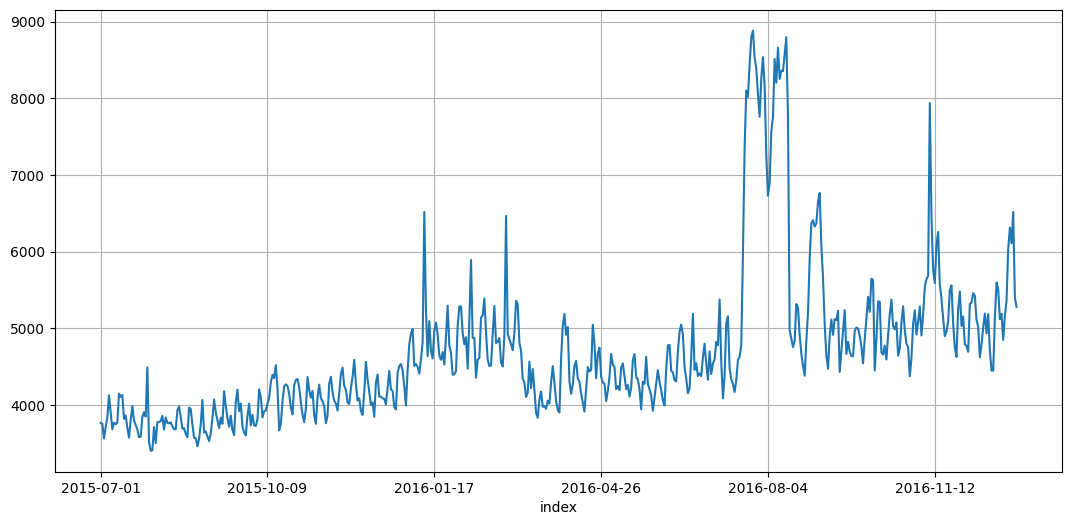

In [50]:
df_mean["en"].plot(figsize=(13,6))
plt.grid()
plt.show()

In [51]:
df_lang = df_mean.copy()

Checking the stationarity of the time series with  Dickey-Fuller test : 


In [52]:
# ad fuller test 

# Null hypothesis : data is not stationary
# Alternate Hypothesis : data is stationary

from statsmodels.tsa.stattools import adfuller

# check for english lang 

def adfuller_test(x):
    result = adfuller(x)
    print("ADF Statistic: %f" % result[0])
    print("p-value: %f" % result[1])
    print("Critical Values:")
    for key, value in result[4].items():
        print("\t%s: %.3f" % (key, value))
        
adfuller_test(df_lang["en"]) 

# we can also run a simple loop and check for other languages too.

ADF Statistic: -2.373563
p-value: 0.149337
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570


let's say significance level is 0.05 , so we can say that data is not stationary as p-value is more than 0.05.

Let's make data stationary : Time series decomposition

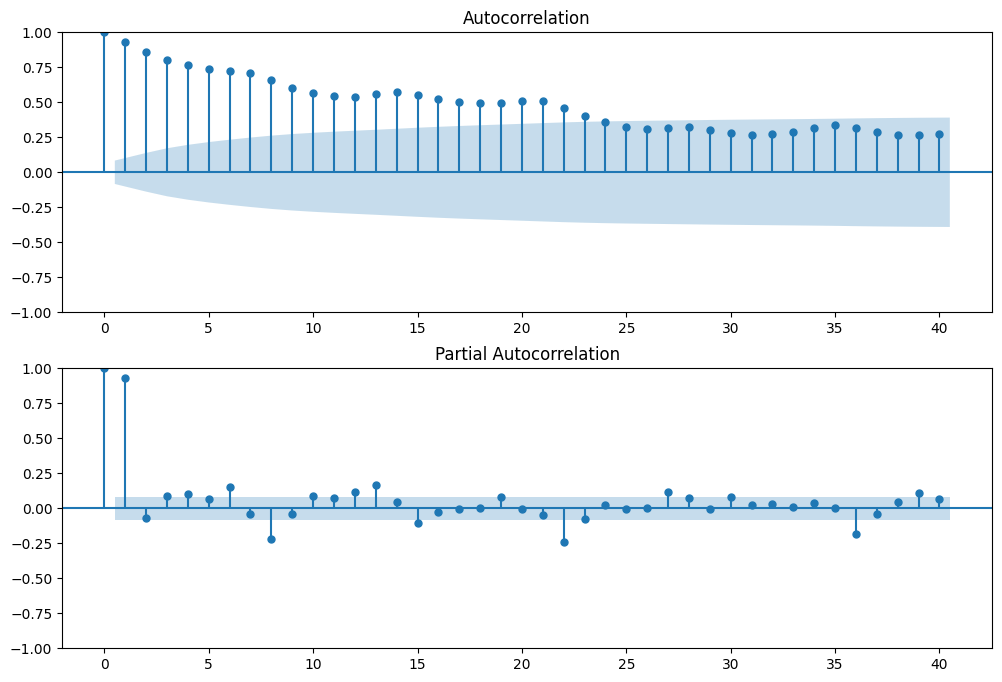

In [53]:
# Acf and Pacf plots

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df_lang["en"],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df_lang["en"],lags=40,ax=ax2)

Remember that the data is daily , from the above ACF plot we can observe that at lag 7 , 14 , 21 there is a spike in correlation co-efficient. Let's assume the period of 7 days and try to decompose the data.

In [57]:
df_lang.index = pd.to_datetime(df_lang.index)

In [60]:
df_eng = df_lang[["en"]]

In [ ]:
# time series decompistion 

from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df_eng, model='additive',period=7)


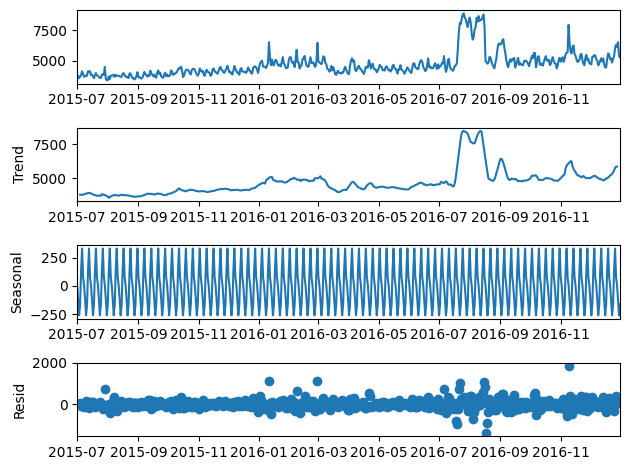

In [67]:
result.plot();

<AxesSubplot: xlabel='index'>

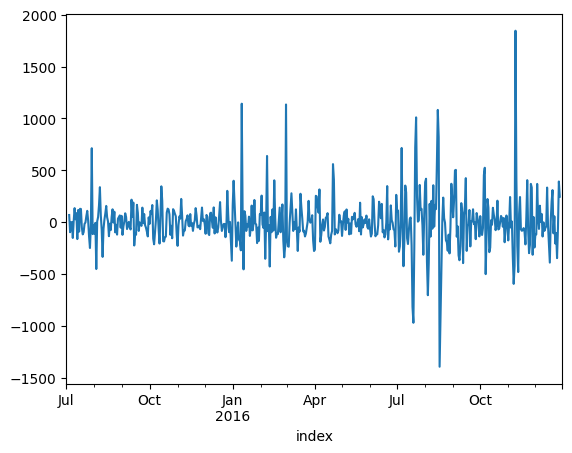

In [68]:
result.resid.plot()

In [69]:
# Applying ad fuller on resid 

adfuller_test(result.resid.dropna())

ADF Statistic: -11.437316
p-value: 0.000000
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570


We could observe that the data is stationary

<AxesSubplot: xlabel='index'>

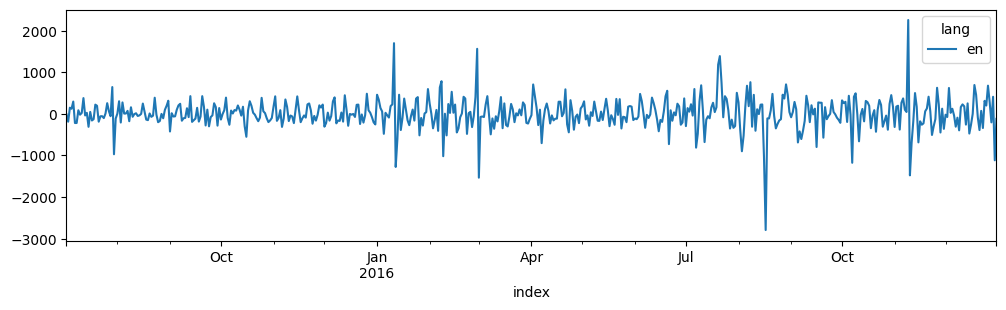

In [73]:
# let's check the differencing 
df_eng.diff(1).dropna().plot(figsize=(12,3))

In [74]:
adfuller_test(df_eng.diff(1).dropna())

ADF Statistic: -8.273590
p-value: 0.000000
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570


Difference or lag of 1 de-stationarized the data , we can use d=1 in ARIMA

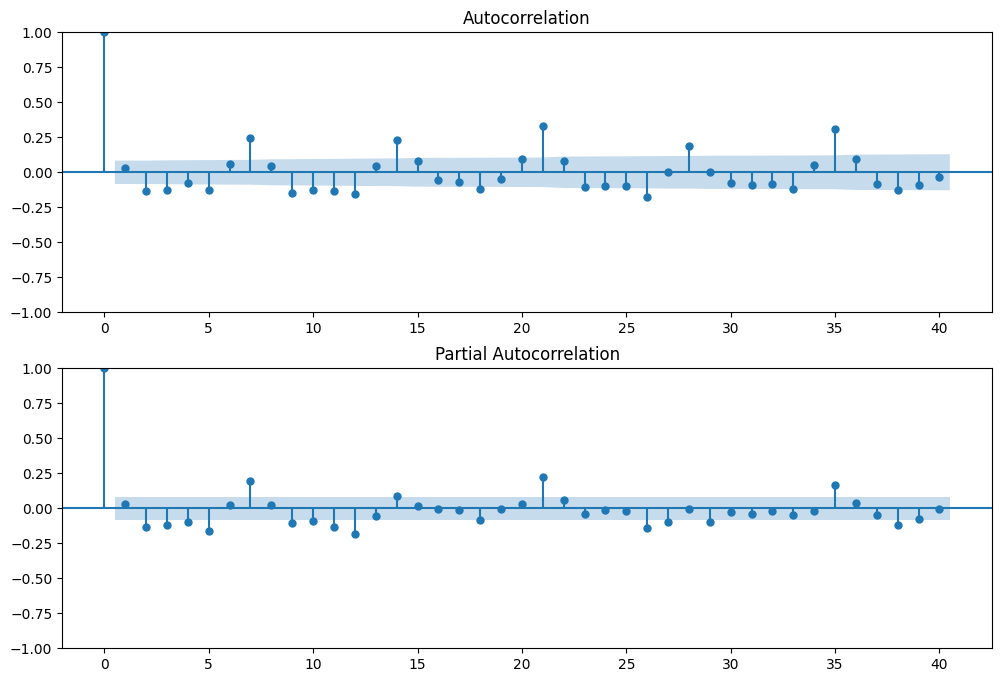

In [75]:
# for the same difference let's plot acf and pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df_eng.diff(1).dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df_eng.diff(1).dropna(),lags=40,ax=ax2)


In ARMA family models, for getting p (Auto-regressive order) we look at PACF plot, there is a cut-off at lag1 due to which it will be considered as the order of AR in ARMA.
Similarly q(Moving Average order) will also be equal to 1 as the value of ACF at lag2 is significantly different from that at lag1. Therefore lag1 is also a cut-off point in ACF plot.

Autoregressive Integrated Moving Average (ARIMA) model and it's extensions

This model is the basic interface for ARIMA-type models, including those
with exogenous regressors and  with seasonal components. The most
general form of the model is SARIMAX(p, d, q)x(P, D, Q, s). It also allows
all specialized cases, including

  autoregressive models: AR(p)

   moving average models: MA(q)

   mixed autoregressive moving average models: ARMA(p, q)

   integration models: ARIMA(p, d, q)

   seasonal models: SARIMA(P, D, Q, s)

In [76]:
df_eng_st = df_eng.diff(1).dropna()

In [78]:
 # metrics 

from sklearn.metrics import( mean_squared_error as mse,
mean_absolute_error as mae,mean_absolute_percentage_error as mape)

def metrics(y_true,y_pred):
    print("MAE",mae(y_true,y_pred))
    print("MSE",mse(y_true,y_pred))
    print("RMSE",np.sqrt(mse(y_true,y_pred)))
    print("MAPE",mape(y_true,y_pred))


### ARIMA model 


In [93]:

# let's use last 30 data points as test data for forecast 

test = df_eng.iloc[-30:]
train = df_eng.iloc[:-30]

from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train,order=(1,1,1)).fit() 
pred = model.forecast(len(test),alpha=0.05)

metrics(test,pred) 


c:\Users\mahik\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\mahik\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\mahik\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


MAE 363.05288200312935
MSE 246731.12128377188
RMSE 496.72036527987444
MAPE 0.0669088024208379


<AxesSubplot: xlabel='index'>

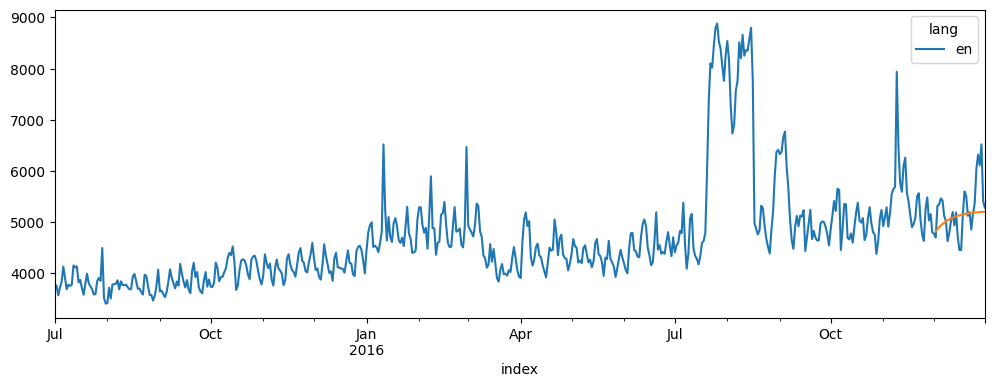

In [95]:
df_eng.plot(figsize=(12,4))
pred.plot()

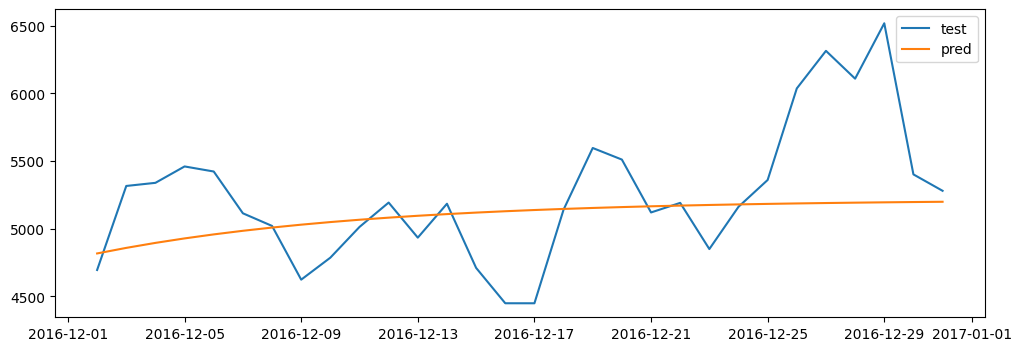

In [96]:
# test vs pred 

plt.figure(figsize=(12,4))
plt.plot(test,label="test")
plt.plot(pred,label="pred")
plt.legend()
plt.show()

SARIMAX model :

In [102]:
# sarimax model 

from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train,order=(2,1,2)).fit()

pred_1 = model.forecast(len(test),alpha=0.05) 

metrics(test,pred_1) 

c:\Users\mahik\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\mahik\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


MAE 407.9895606582989
MSE 300530.3824335839
RMSE 548.2065144027239
MAPE 0.07418494010841041


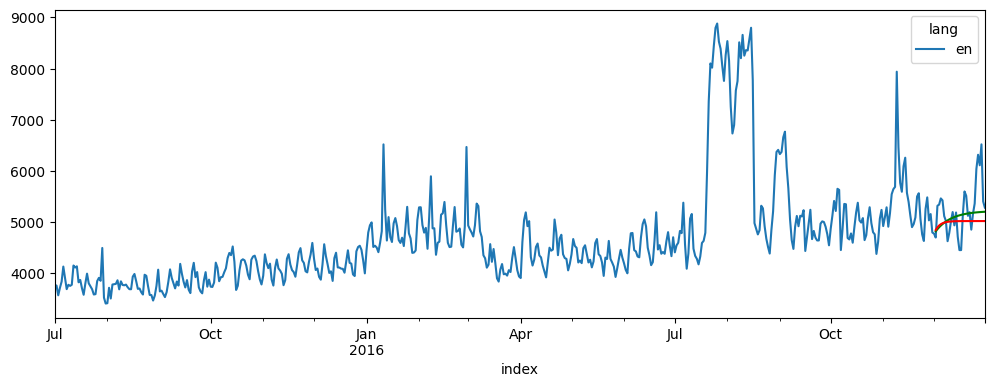

In [106]:
df_eng.plot(figsize=(12,4))
plt.plot(pred,label="arima",color="green")
plt.plot(pred_1,label="sarimax",color="red")

from the decompostion we observed that there is weekly seasonality in the data and there are spikes in the residual as well. Let's take exo-geneous variable into  account

In [108]:
ex_df = pd.read_csv('Exog_Campaign_eng.csv')
ex_df.head()

,Exog
0,0
1,0
2,0
3,0
4,0
